In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('VKR_docs_structure.csv')
df['preproc_text'] = df['preproc_text'].apply(lambda x: ' '.join(eval(x)))
print(len(df))
df.head()

360


,path_doc,title,text_paper,dict_sections_texts,faculty_department,faculty,department,degree,dict_sections_texts_clean,main_clean_text,preproc_text,introduction,contents,conclusion,TZ,problems,count_problems
0,C:/Users/JM 505 Computers/Desktop/Repetitor/Ул...,Анализ методов обеспечения безопасной передачи...,"['ВЫПУСКНАЯ КВАЛИФИКАЦИОННАЯ РАБОТА', 'АНАЛИЗ ...","{'ВЫПУСКНАЯ КВАЛИФИКАЦИОННАЯ РАБОТА': [], 'АНА...",['ФБИТ'],ФБИТ,ФБИТ,bachelor,{'анализ методов обеспечения безопасной переда...,"['Автор Павлов Денис Дмитриевич', '(Фамилия, И...",автор павлов денис дмитриевич фамилия имя отче...,['Долгое время для наблюдения за любым процесс...,"['Уровень 1: уровень элементов 15', 'Уровень 2...","['Интернет вещей - это сетевая система, состоя...",NONE,[],0
1,C:/Users/JM 505 Computers/Desktop/Repetitor/Ул...,Анализ психологических типов сотрудников для м...,['Министерство науки и высшего образования Рос...,{'Министерство науки и высшего образования Рос...,['ФБИТ'],ФБИТ,ФБИТ,bachelor,{'министерство науки и высшего образования рос...,['ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ ОБРАЗ...,федеральный государственный автономный образов...,['В данной работе затрагивается проблема обесп...,['ГЛАВА 1 ОСНОВЫ СОЦИАЛЬНОЙ ИНЖЕНЕРИИ КАК СРЕД...,['В проведенном исследовании успешность приним...,NONE,[],0
2,C:/Users/JM 505 Computers/Desktop/Repetitor/Ул...,Исследование влияния алгоритма стохастического...,['Министерство науки и высшего образования Рос...,{'Министерство науки и высшего образования Рос...,['ФБИТ'],ФБИТ,ФБИТ,bachelor,{'исследование влияния алгоритма стохастическо...,"['Автор Бахтиярова Алина Шамильевна (Фамилия, ...",автор бахтияров алина шамильевич фамилия имя о...,['Система обнаружения вторжений (СОВ) — это си...,['Задание на выпускную квалификационную работу...,['В ходе выполнения данной работы был произвед...,NONE,[],0
3,C:/Users/JM 505 Computers/Desktop/Repetitor/Ул...,Разработка VPN-приложения для мобильных устрой...,['Министерство науки и высшего образования Рос...,{'Министерство науки и высшего образования Рос...,['ФБИТ'],ФБИТ,ФБИТ,bachelor,{'выпускная квалификационная работа': ['РАЗРАБ...,['РАЗРАБОТКА VPN-ПРИЛОЖЕНИЯ ДЛЯ МОБИЛЬНЫХ УСТР...,разработка vpnприложение для мобильный устройс...,['Современные компьютерные технологии плотно з...,"['Реализация сервера OpenVPN 46', 'Установка О...",['В результате проделанной работы было разрабо...,NONE,[],0
4,C:/Users/JM 505 Computers/Desktop/Repetitor/Ул...,Разработка автоматизированной системы защиты и...,['Министерство науки и высшего образования Рос...,{'Министерство науки и высшего образования Рос...,['ФБИТ'],ФБИТ,ФБИТ,bachelor,{'разработка автоматизированной системы защиты...,"['Автор Пенин Андрей Семенович', '(Фамилия, Им...",автор пенина андрей семёнович фамилия имя отче...,['В течение всех этапов развития человеческого...,['СПИСОК ИСПОЛЬЗОВАННЫХ ИСТОЧНИКОВ 79'],['В ходе выполнения данной выпускной квалифика...,NONE,[],0


In [3]:
le_department = LabelEncoder() 
df['department_label'] = le_department.fit_transform(df['department'])

le_faculty = LabelEncoder() 
df['faculty_label'] = le_faculty.fit_transform(df['faculty'])

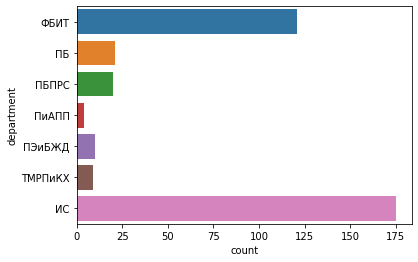

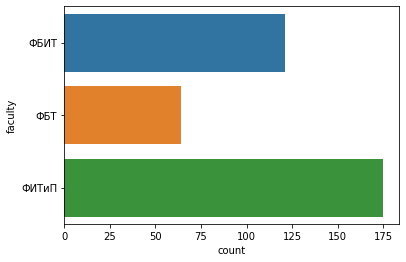

In [4]:
sns.countplot(y = df['department'])
plt.show()

sns.countplot(y = df['faculty'])
plt.show()

### Departments

train


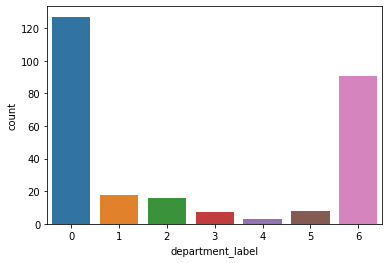

test


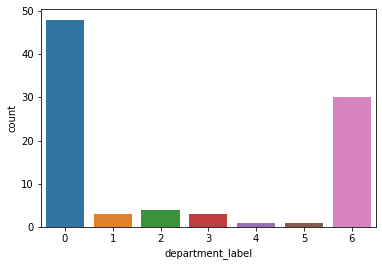

Pipeline(steps=[('vect', TfidfVectorizer(use_idf=False)),
                ('model', LogisticRegression(C=8, random_state=0))])
accuracy: 0.9666666666666667


              precision    recall  f1-score   support

          ИС       1.00      0.98      0.99        48
          ПБ       1.00      0.67      0.80         3
       ПБПРС       0.80      1.00      0.89         4
      ПЭиБЖД       1.00      0.67      0.80         3
       ПиАПП       1.00      1.00      1.00         1
     ТМРПиКХ       1.00      1.00      1.00         1
        ФБИТ       0.94      1.00      0.97        30

    accuracy                           0.97        90
   macro avg       0.96      0.90      0.92        90
weighted avg       0.97      0.97      0.97        90

Wall time: 6min 31s


Pipeline(steps=[('vect', TfidfVectorizer(use_idf=False)),
                ('model', LogisticRegression(C=8, random_state=0))])

In [5]:
%%time

X_train, X_test, y_train, y_test = train_test_split(df['preproc_text'], df['department_label'], train_size=0.75)

print('train')
sns.countplot(y_train)
plt.show()

print('test')
sns.countplot(y_test)
plt.show()

pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('model',LogisticRegression(random_state = 0))])

params={'model__C':np.arange(10),
        'model__penalty':['l1','l2', 'elasticnet'], 
        'model__solver':['liblinear','lbfgs'],
        'vect__use_idf':[True, False],
        'vect__norm':['l1', 'l2']}

grid = GridSearchCV(pipeline, cv=3, n_jobs=-1, param_grid=params)
grid.fit(X_train, y_train)
model_best_department = grid.best_estimator_
print(model_best_department)

predicted_department = model_best_department.predict(X_test)
print('accuracy:', metrics.accuracy_score(predicted_department, y_test))
print('\n')
print(metrics.classification_report(y_test, predicted_department, target_names=le_department.classes_))
model_best_department.fit(X_train, y_train)

In [6]:
fi_department = pd.DataFrame(model_best_department.named_steps['model'].coef_.T)
fi_department = fi_department.rename(\
                columns={c:'coef_' + le_department.inverse_transform([int(c)])[0] for c in fi_department.columns})
fi_department.index = model_best_department.named_steps['vect'].get_feature_names()
fi_department = fi_department.sort_values(by = list(fi_department.columns), ascending =False)
print(len(fi_department))
fi_department.head(10)

69377


,coef_ИС,coef_ПБ,coef_ПБПРС,coef_ПЭиБЖД,coef_ПиАПП,coef_ТМРПиКХ,coef_ФБИТ
требование,2.084084,0.280402,-0.496979,-0.332885,-0.166997,-0.166139,-1.201485
модуль,1.962459,-0.154149,-0.170519,-0.185327,-0.116480,-0.174280,-1.161705
работа,1.870121,-0.369346,-0.320911,0.075355,-0.245141,-0.706737,-0.303342
компонент,1.834087,0.098434,-0.238956,-0.316170,-0.157102,0.139086,-1.359380
класс,1.674797,-0.179424,-0.248740,-0.163337,-0.133384,-0.119231,-0.830681
запрос,1.590238,-0.121534,-0.173353,-0.172075,-0.091319,-0.148023,-0.883935
архитектура,1.531809,-0.097264,-0.137750,-0.137831,-0.071493,-0.111050,-0.976421
описание,1.413647,-0.079482,-0.153647,-0.162311,-0.028820,-0.203848,-0.785540
процесс,1.368720,-0.112628,-0.437934,-0.086479,0.643715,0.210842,-1.586235
система,1.333077,-0.224152,-1.180739,-0.572684,-0.345994,-0.354672,1.345165


In [14]:
# Наиболее значимые слова для направлений
fi_department_keys = []
for col in fi_department.columns:
    fi_department_col = fi_department[col].sort_values(ascending =False)[:15]
    department_keywords = fi_department_col.index.values
    fi_department_keys.append({'department':col.split('_')[1], 'keywords':department_keywords})
    print(col)
    print(fi_department_col)
    print('\n')

fi_department_keys = pd.DataFrame(fi_department_keys)
fi_department_keys.to_csv('department_keywords.csv', index = False)  
fi_department_keys

coef_ИС
требование     2.084084
модуль         1.962459
работа         1.870121
компонент      1.834087
класс          1.674797
запрос         1.590238
архитектура    1.531809
описание       1.413647
процесс        1.368720
система        1.333077
документ       1.261220
данные         1.246188
задача         1.201566
сервис         1.096795
диаграмма      1.091880
Name: coef_ИС, dtype: float64


coef_ПБ
молоко               2.676391
продукт              2.293165
таблица              1.752265
сыр                  1.679726
показатель           1.413408
молочный             1.361758
производство         1.226884
напиток              1.019536
температура          0.998818
органолептический    0.963245
чайный               0.938586
масса                0.927408
гриб                 0.905135
кг                   0.898648
смесь                0.886466
Name: coef_ПБ, dtype: float64


coef_ПБПРС
напиток         1.826887
дрожжи          1.583954
клетка          1.527391
содержание      1.435629

,department,keywords
0,ИС,"[требование, модуль, работа, компонент, класс,..."
1,ПБ,"[молоко, продукт, таблица, сыр, показатель, мо..."
2,ПБПРС,"[напиток, дрожжи, клетка, содержание, раствор,..."
3,ПЭиБЖД,"[отход, проект, газ, год, нефть, металл, тяжёл..."
4,ПиАПП,"[пиво, производство, хлеб, ржаной, колбаса, ко..."
5,ТМРПиКХ,"[масло, рыба, продукт, быть, шоколад, лакомств..."
6,ФБИТ,"[безопасность, информация, защита, алгоритм, с..."


### Faculties

train


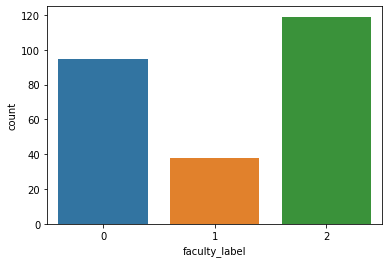

test


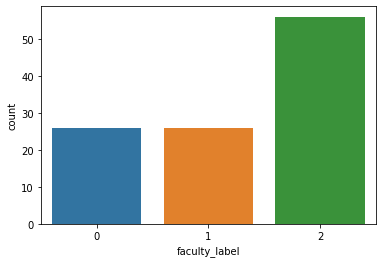

Pipeline(steps=[('vect', TfidfVectorizer(use_idf=False)),
                ('model', LogisticRegression(C=5, random_state=0))])
accuracy: 0.9722222222222222


              precision    recall  f1-score   support

        ФБИТ       0.96      0.96      0.96        26
         ФБТ       1.00      0.96      0.98        26
       ФИТиП       0.96      0.98      0.97        56

    accuracy                           0.97       108
   macro avg       0.98      0.97      0.97       108
weighted avg       0.97      0.97      0.97       108

Wall time: 4min 4s


In [15]:
%%time

X_train, X_test, y_train, y_test = train_test_split(df['preproc_text'], df['faculty_label'], test_size=0.3)

print('train')
sns.countplot(y_train)
plt.show()

print('test')
sns.countplot(y_test)
plt.show()


pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('model',LogisticRegression(random_state = 0))])

params={'model__C':np.arange(10),
        'model__penalty':['l1','l2', 'elasticnet'], 
        'model__solver':['liblinear','lbfgs'],
        'vect__use_idf':[True, False],
        'vect__norm':['l1', 'l2']}

grid = GridSearchCV(pipeline, cv=3, n_jobs=-1, param_grid=params)
grid.fit(X_train, y_train)
model_best_faculty = grid.best_estimator_
print(model_best_faculty)

predicted_faculty = model_best_faculty.predict(X_test)
print('accuracy:', metrics.accuracy_score(predicted_faculty, y_test))
print('\n')
print(metrics.classification_report(y_test, predicted_faculty, target_names=le_faculty.classes_))

In [16]:
fi_faculty = pd.DataFrame(model_best_faculty.named_steps['model'].coef_.T)
fi_faculty = fi_faculty.rename(\
                columns={c:'coef_' + le_faculty.inverse_transform([int(c)])[0] for c in fi_faculty.columns})
fi_faculty.index = model_best_faculty.named_steps['vect'].get_feature_names()
fi_faculty= fi_faculty.sort_values(by = list(fi_faculty.columns), ascending =False)
print(len(fi_faculty))
fi_faculty.head(10)

63424


,coef_ФБИТ,coef_ФБТ,coef_ФИТиП
безопасность,2.256469,-0.372384,-1.884086
информация,2.034016,-1.085068,-0.948948
защита,1.967285,-0.430851,-1.536434
алгоритм,1.453883,-0.607171,-0.846713
доступ,1.336994,-0.393197,-0.943797
атака,1.254707,-0.302253,-0.952454
обеспечение,1.221595,-0.299124,-0.922471
угроза,1.219176,-0.245253,-0.973923
сеть,1.208362,-0.358514,-0.849847
уязвимость,1.196834,-0.172336,-1.024498


In [17]:
# Наиболее значимые слова для факультетов
fi_faculty_keys = []
for col in fi_faculty.columns:
    fi_faculty_col = fi_faculty[col].sort_values(ascending =False)[:15]
    faculty_keywords = fi_faculty_col.index.values
    fi_faculty_keys.append({'faculty':col.split('_')[1], 'keywords':faculty_keywords})
    print(col)
    print(fi_faculty_col)
    print('\n')

fi_faculty_keys = pd.DataFrame(fi_faculty_keys)
fi_faculty_keys.to_csv('faculty_keywords.csv', index = False)  
fi_faculty_keys

coef_ФБИТ
безопасность      2.256469
информация        2.034016
защита            1.967285
алгоритм          1.453883
доступ            1.336994
атака             1.254707
обеспечение       1.221595
угроза            1.219176
сеть              1.208362
уязвимость        1.196834
анализ            1.194169
информационный    1.098328
ключ              1.012723
протокол          0.979156
устройство        0.902800
Name: coef_ФБИТ, dtype: float64


coef_ФБТ
продукт         1.597284
вода            1.541490
производство    1.303213
температура     1.171026
напиток         0.979959
пищевой         0.877116
вещество        0.874404
сырьё           0.861057
молоко          0.855634
содержание      0.807261
дрожжи          0.793387
показатель      0.767122
клетка          0.755035
образец         0.680402
исследование    0.678981
Name: coef_ФБТ, dtype: float64


coef_ФИТиП
требование     1.627737
работа         1.556735
модуль         1.495555
класс          1.412431
компонент      1.326046
зап

,faculty,keywords
0,ФБИТ,"[безопасность, информация, защита, алгоритм, д..."
1,ФБТ,"[продукт, вода, производство, температура, нап..."
2,ФИТиП,"[требование, работа, модуль, класс, компонент,..."
